<a href="https://colab.research.google.com/github/guilhermelaviola/MinimumWage/blob/main/MinimumWageBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-9ec223f05a52>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'minimum-wage-br.xlsx'
search_path = '/content/drive/My Drive/Datasets/Finances'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read.excel(file)

# **Basic information of the dataset**



In [6]:
# Importing the main dataset and displaying the last 10 rows:
df = pd.ExcelFile(file)
main_df = pd.read_excel(df, 'minimum-wage')
main_df.tail()

,Month/Year,Dolar exchange rate,Minimum wage,Currency
461,2024-01-06,5.1423,1412.0,Reais (R$)
462,2024-01-07,5.3630,1412.0,Reais (R$)
463,2024-01-08,5.4563,1412.0,Reais (R$)
464,2024-01-09,5.4651,1412.0,Reais (R$)
465,2024-01-10,5.5717,1412.0,Reais (R$)


In [7]:
# Displaying the number of rows and columns in the dataset:
main_df.shape

(466, 4)

In [8]:
# Displaying the datatypes of each column:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month/Year           466 non-null    datetime64[ns]
 1   Dolar exchange rate  466 non-null    float64       
 2   Minimum wage         463 non-null    float64       
 3   Currency             466 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.7+ KB


In [9]:
# Displaying statistical data of the numerical data present in the dataset:
main_df.describe()

,Month/Year,Dolar exchange rate,Minimum wage
count,466,466.000000,4.630000e+02
mean,2004-12-07 07:28:04.120171648,871.162589,4.897313e+04
min,1986-01-01 00:00:00,0.835000,6.390000e+01
25%,1995-01-09 06:00:00,1.862425,2.200000e+02
50%,2005-01-05 12:00:00,2.905300,6.220000e+02
75%,2015-01-01 18:00:00,5.300500,1.100000e+03
max,2024-01-10 00:00:00,80851.000000,4.639800e+06
std,NaN,5883.345787,3.396281e+05


# **Basic column data plotting**

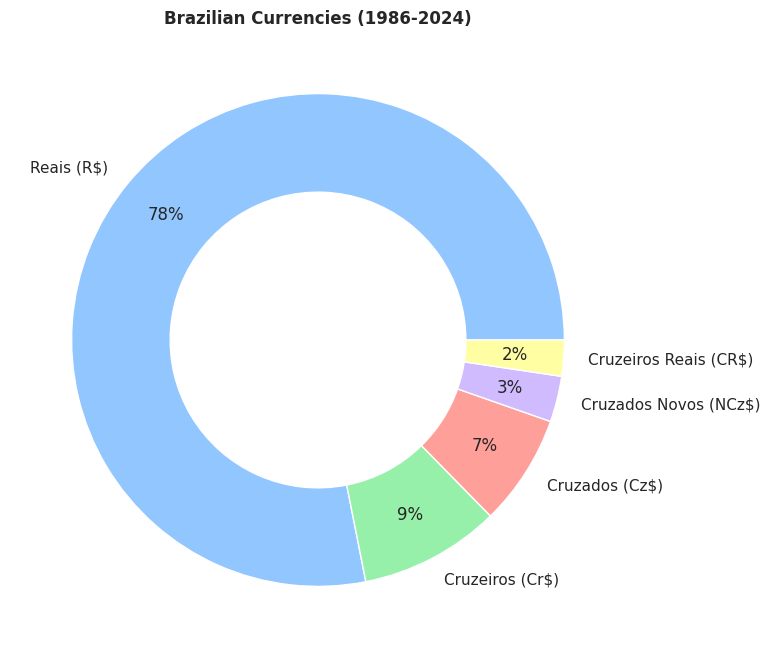

In [23]:
# Displaying the currency types present in the dataset:
main_df['Currency'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Brazilian Currencies (1986-2024)', fontweight = 'bold')
plt.show()

In [24]:
# Filtering the wages by currency:
cruzeiros = main_df[(main_df['Currency'] == 'Cruzeiros (Cr$)')]
cruzados = main_df[(main_df['Currency'] == 'Cruzados (Cz$)')]
cruzados_novos = main_df[(main_df['Currency'] == 'Cruzados Novos (NCz$)')]
cruzeiros_reais = main_df[(main_df['Currency'] == 'Cruzeiros Reais (CR$)')]
reais = main_df[(main_df['Currency'] == 'Reais (R$)')]

In [26]:
# Displaying the number of rows and columns in the 'Cruzeiros (Cr$)' filtered dataset:
cruzeiros.shape

(43, 4)

In [27]:
# Displaying the number of rows and columns in the 'Cruzados (Cz$)' filtered dataset:
cruzados.shape

(34, 4)

In [28]:
# Displaying the number of rows and columns in the 'Cruzados Novos (NCz$)' filtered dataset:
cruzados_novos.shape

(14, 4)

In [29]:
# Displaying the number of rows and columns in the 'Cruzeiros Reais (CR$)' filtered dataset:
cruzeiros_reais.shape

(11, 4)

In [31]:
# Displaying the number of rows and columns in the 'Reais (R$)' filtered dataset:
reais.shape

(364, 4)

# **Studying the variation in the Real (R$) Era**

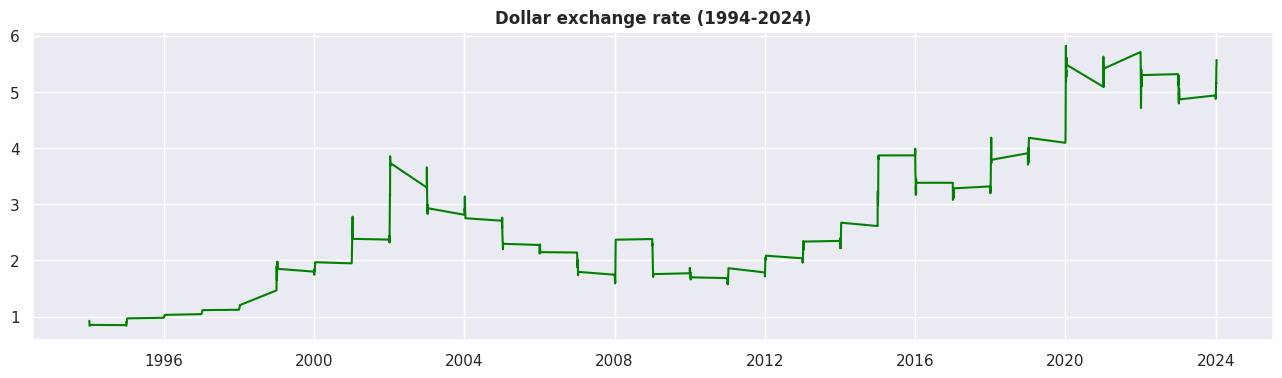

In [32]:
# Displaying the US Dollar exchange rate variation in Brazil between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Dollar exchange rate (1994-2024)', fontweight = 'bold')
plt.plot(reais['Month/Year'], reais['Dolar exchange rate'], color = 'green')
plt.show()

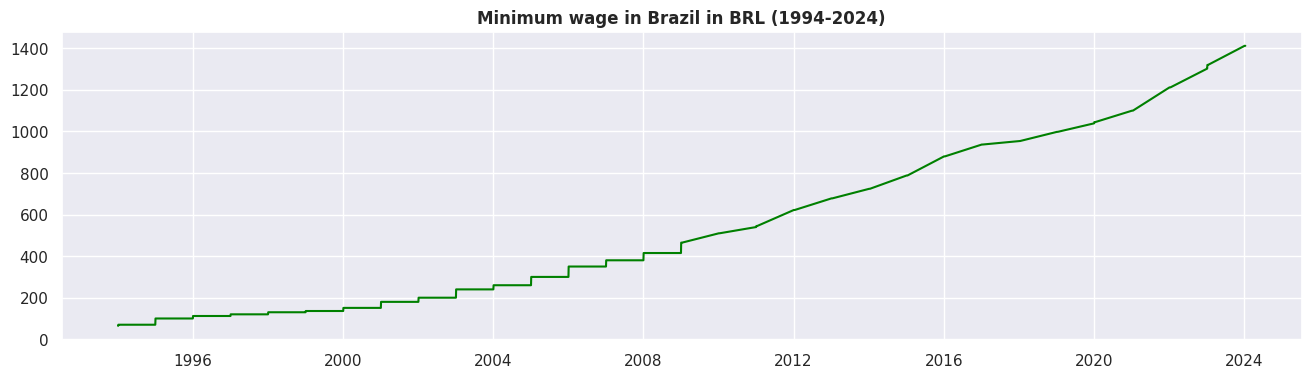

In [33]:
# Displaying the the brazilian minimum wage variation in Brazilian Reais (BRL) between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in BRL (1994-2024)', fontweight = 'bold')
plt.plot(reais['Month/Year'], reais['Minimum wage'], color = 'green')
plt.show()

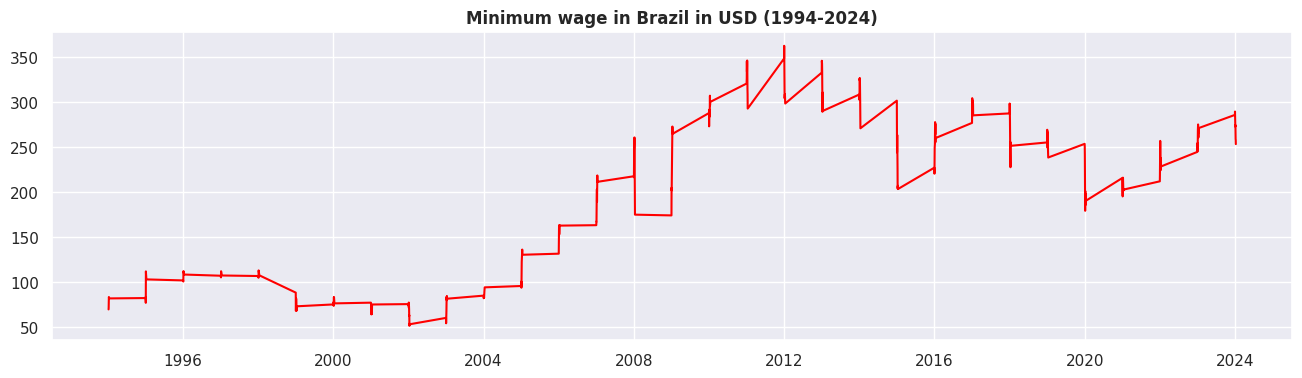

In [34]:
# Displaying the the brazilian minimum wage variation in US Dollars (USD) between 1994 and 2024:
wage_in_dollars = reais['Minimum wage'] / reais['Dolar exchange rate']
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in USD (1994-2024)', fontweight = 'bold')
plt.plot(reais['Month/Year'], wage_in_dollars, color = 'red')
plt.show()

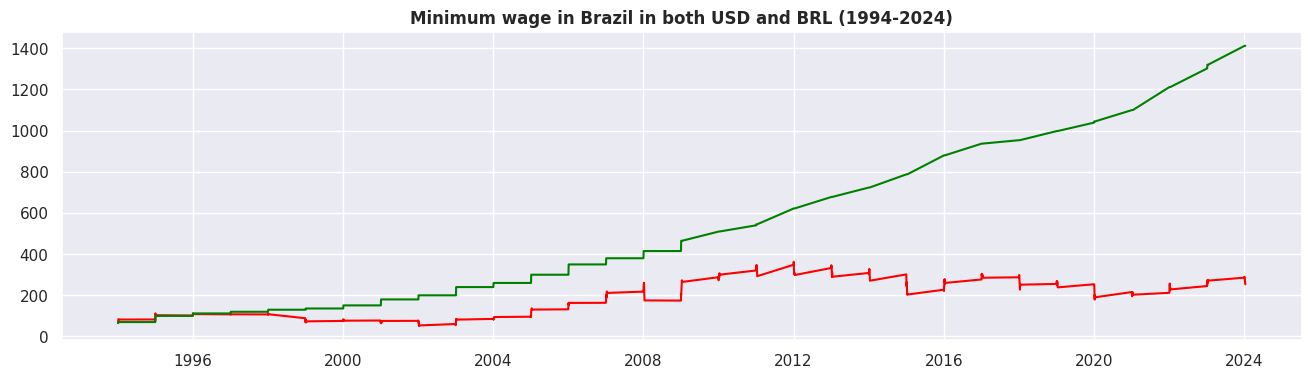

In [36]:
# Displaying the the brazilian minimum wage variation (inboth USD and BRL) between 1994 and 2024:
plt.figure(figsize = (16, 4))
plt.title('Minimum wage in Brazil in both USD and BRL (1994-2024)', fontweight = 'bold')
plt.plot(reais['Month/Year'], wage_in_dollars, color = 'red')
plt.plot(reais['Month/Year'], reais['Minimum wage'], color = 'green')
plt.show()

# **Studying the variation in the Cruzeiros (Cr$) Era**

# **Studying the variation in the Cruzados (Cz$) Era**

# **Studying the variation in the Cruzados Novos (Cr$) Era**

# **Studying the variation in the Cruzeiros Reais (CR$) Era**